<a href="https://colab.research.google.com/github/crisnandrarm/Classification_DTI_Task/blob/main/Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification (Case Study: Bank Marketing Dataset)**

## **Dataset Description**


Dataset ini merupakan data Bank Marketing yang diperoleh dari "*Kaggle Bank Marketing Dataset*” yang berjumlah 11162 data. Data set Bank Marketing yang digunakan memiliki 16 atribut dan 1 atribut class. Berikut adalah penjelasan informasi atribut:

##### **Atribut terkait data Client:**

1. **age**: Data usia dalam bentuk numerik
2. **job** : Merupakan jenis pekerjaan yang digeluti, dalam atribut ini memiliki beberapa kategori yaitu: "admin", "unknown", "unemployed", "management", "housemaid","entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services"
3. **martial**: Merupakan status pernikahan yang dikategorika menjadi 4 kategori yaitu: "married", "divorced", "single", dan "unknown"
4. **education**: Merupakan latar belakang pendidikan yang dikategorikan menjadi "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", dan "unknown"
5. **default**: Merupakan atribut yang berisi apakah pernah terjadi kegagalan kredit atau tidak, atribut ini memiliki kategori yaitu: "yes", "no" dan "unknown".
6. **balance**: Merupakan saldo tabungan setiap individu. Atribut ini dalam bentuk numerik.
7. **housing**: Merupakan aribut yang berisi apakah memiliki kredit perumahan atau tidak. Atribut ini merupakan atribut kategoris dengan kategori: "yes", "no" dan "unknown"
8. **loan**: Merupakan aribut yang berisi apakah memiliki kredit peminjaman pribadi atau tidak. Atribut ini merupakan atribut kategoris dengan kategori: "yes", "no" dan "unknown"

##### **Atribut terkait dengan kontak terakhir kampanye saat ini:**

9. **contact**: Merupakan jenis alat komunikasi yang dilakukan saat terakhir menghubungi client, atribut ini memiliki 3 kategori yaitu: "unknown", "telephone", "cellular"

10. **month**: Merupakan bulan terakhir kontak dalam 1 tahun. Kategori dalam atribut ini berupa nama bulan dalam 1 tahun ("jan", "feb", "mar", ..., "nov", "dec")
 
11. **day**: Merupakan hari terakhir dimana dilakukan kontak dalam 1 minggu. Atribut ini merupakan data kategoris dengan kategori: 'mon','tue','wed','thu','fri'
12. **duration**: Merupakan durasi kontak terakhir dalam satuan detik.Tipe data atribut ini merupakan numerik. 


##### **Atribut lainnya:**


13. **campaign**: Merupakan jumlah kontak yang dilakukan saat campaign sedang berjalan, termasuk kontak terakhir kali. Atribut ini dalam bentuk
numerik
14. **pdays**: Merupakan jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya. Atribut ini dalam bentuk numerik

15. **previous**: Merupakan jumah kontak yang dilakukan sebelum campaign dilakukan. Atribut ini merupakan data numerik.
 
16. **poutcome**: Merupakan hasil dari penawaran sebelumnya. Atribut inimemiliki beberapa kategori yaitu: "unknown", "other", "failure", "success".


##### **Atribut Class:**


17. **deposit** - merupakan atribut class yang menunjikkan apakah client bersedia berlangganan deposito berjangka atau tidak. Atribut ini memiliki kategori “yes” dan “no”.


##### **Data Source:**

https://www.kaggle.com/janiobachmann/bank-marketing-dataset

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## **Analysis with Python Code**

### **Import Library**


In [1]:
# Library for dataset
import pandas as pd
import numpy as np

# Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

#Library for preprocessing data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

#Library for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree

#Library for Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### **Exploratory Data Analysis**

#### **Import data**

In [2]:
bank_data = pd.read_csv('https://raw.githubusercontent.com/crisnandrarm/Classification_DTI_Task/main/bank.csv', sep =",")
# bank_data = pd.read_csv('https://raw.githubusercontent.com/crisnandrarm/Classification_DTI_Task/main/bank-full.csv', sep =";")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


#### **Data Information**

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Dari informasi diatas kita dapat mengetahui bahwa seluruh atribut dalam yang digunakan tidak memiliki missing value sehingga tidak perlu dilakukan penanganan terhadap missing value saat tahap preprocessing

In [4]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


Dari deskripsi tabel diatas kita dapat melihat bahwa setiap atribut numerik memiliki interval yang berbeda. Maka dari itu data harus dinormalisasi atau distandardisasi agar menghindari ketergantunagan pada satuan pengukuran dan proses pembelajaran tidak bias. Proses normalisasi akan dilakukan pada tahap preprocessing data

#### **Data Visualization**


##### **Attribute Class Distribution**

Text(0.5, 1.0, 'Class Distribution')

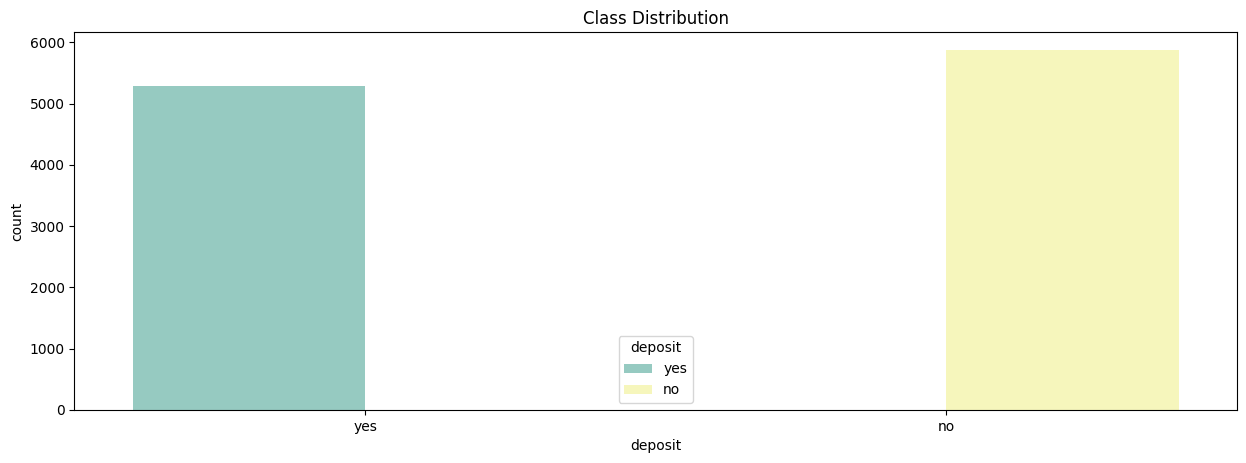

In [5]:
fig, ax = plt.subplots(figsize=(15,5),dpi=100)
sns.countplot(x='deposit', hue="deposit", data=bank_data, palette="Set3")
plt.title("Class Distribution")

Atribut class/target bisa dibilang cukup seimbang. Jika dataset yang digunakan imbalance/tidak seimbang maka perlu diperhatikan lebih lanjut. Hal ini penting untuk diingat saat melakukan klasifikasi dan evaluasi, karena Imbalanced data menyebabkan sulitnya mengembangkan model prediksi yang baik karena hanya fokus pada pengembangan model dengan salah satu target.




##### **Feature Attribute Distribution**


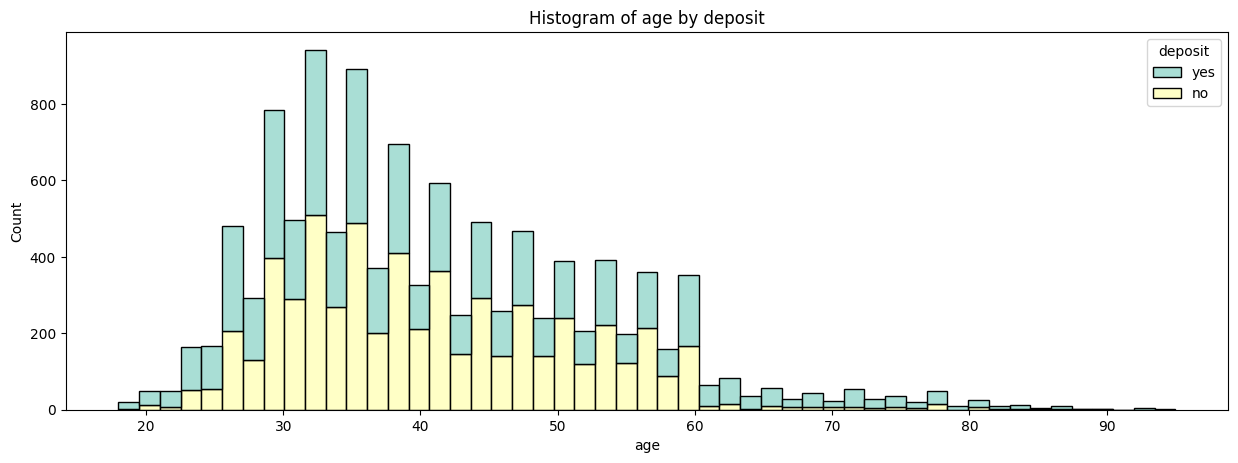

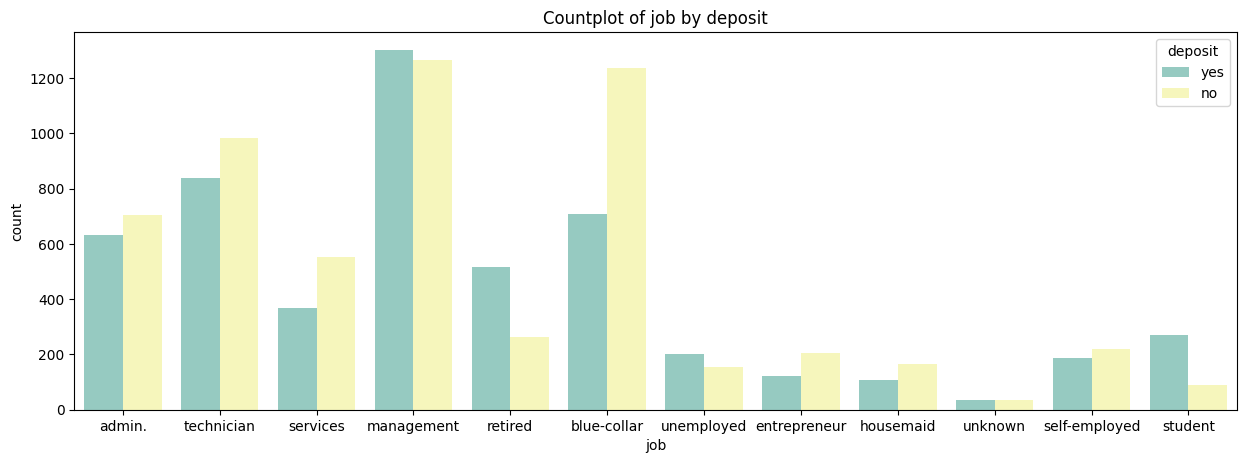

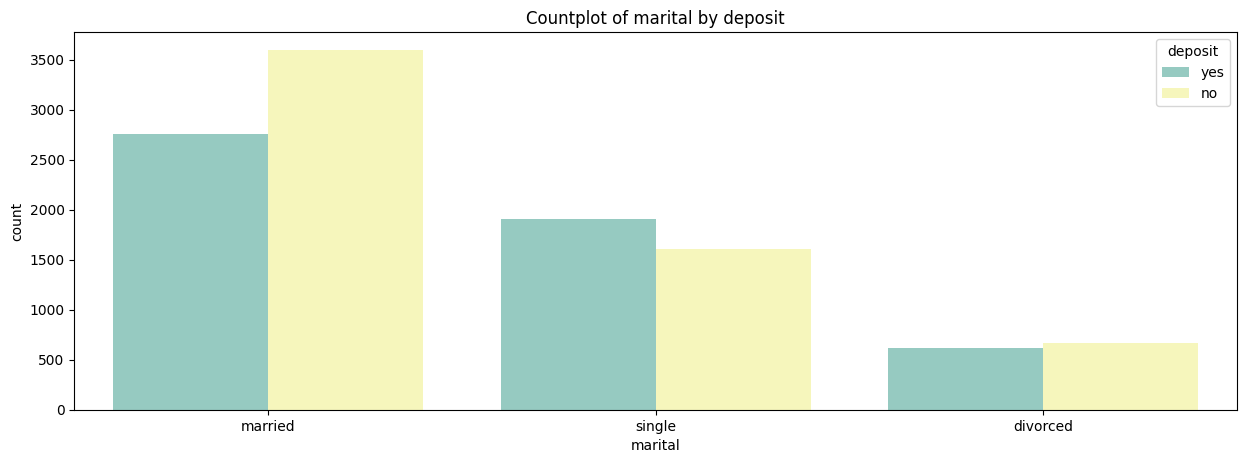

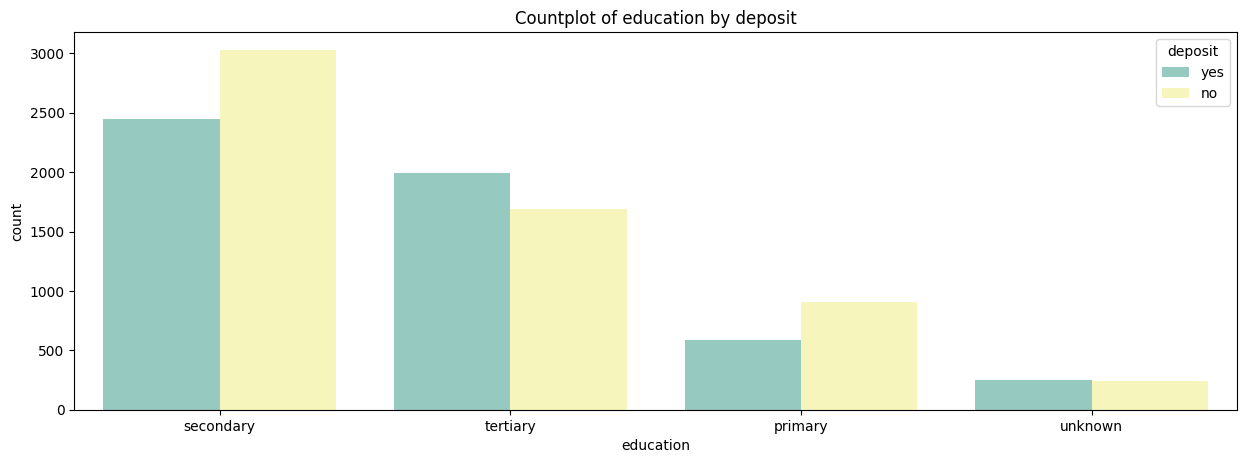

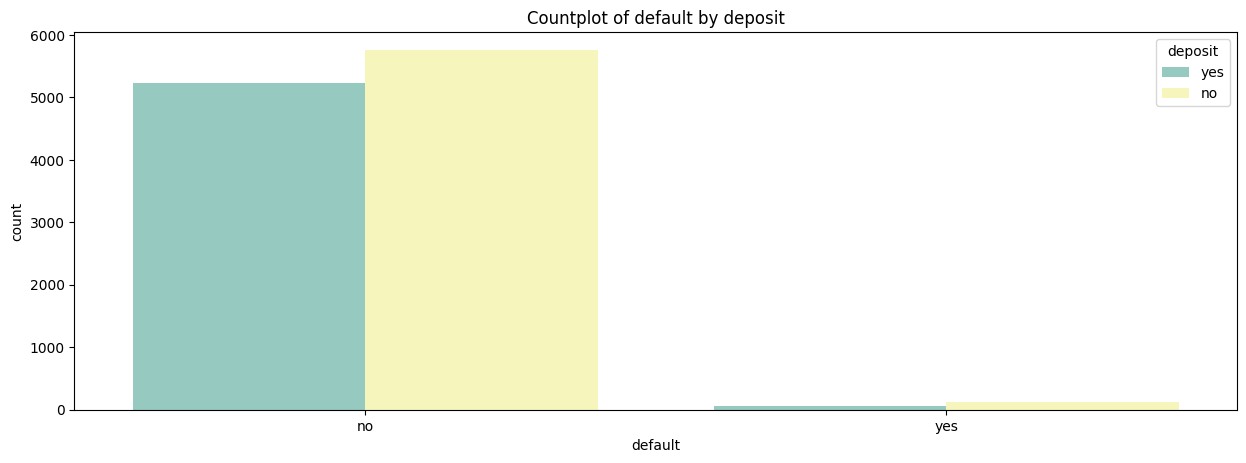

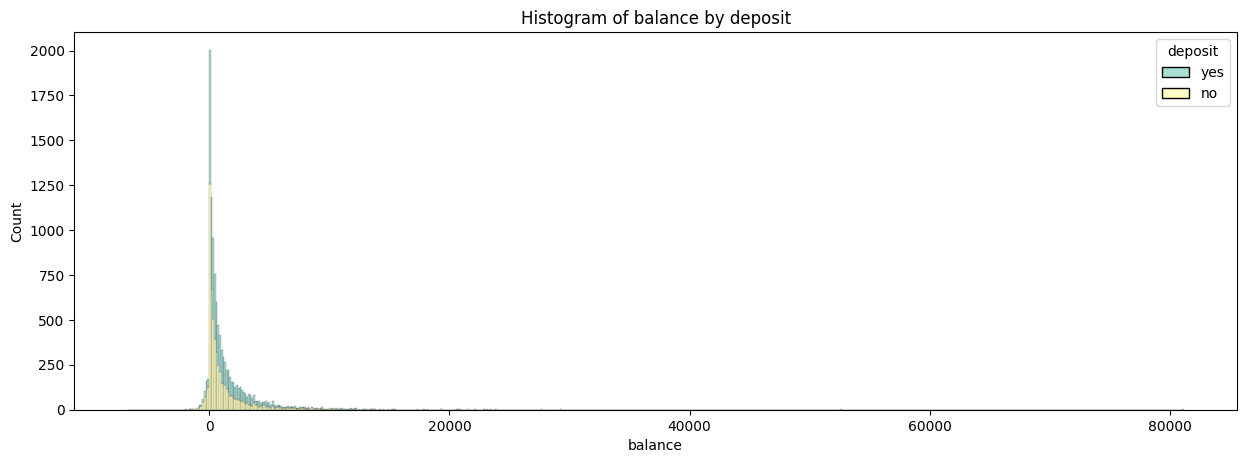

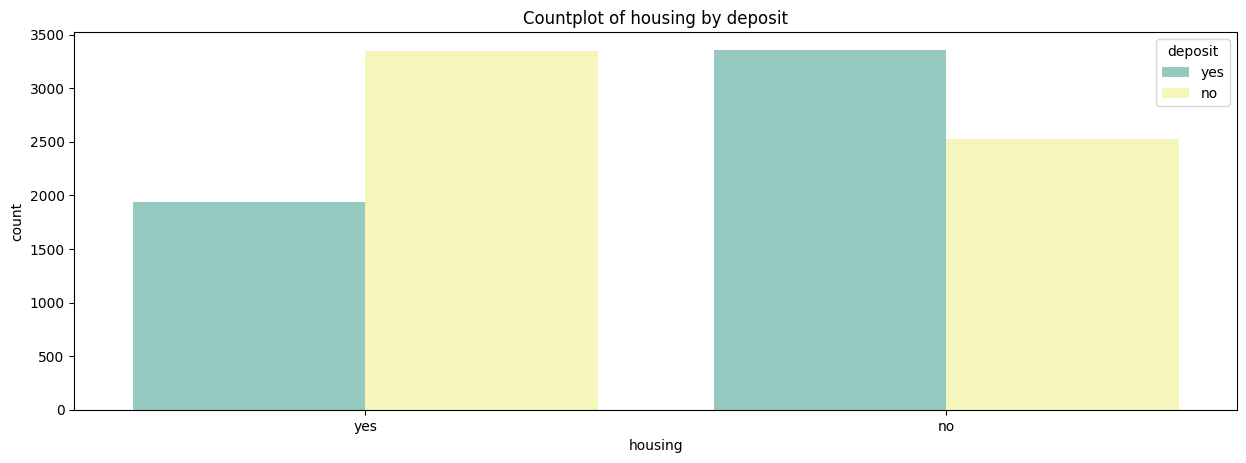

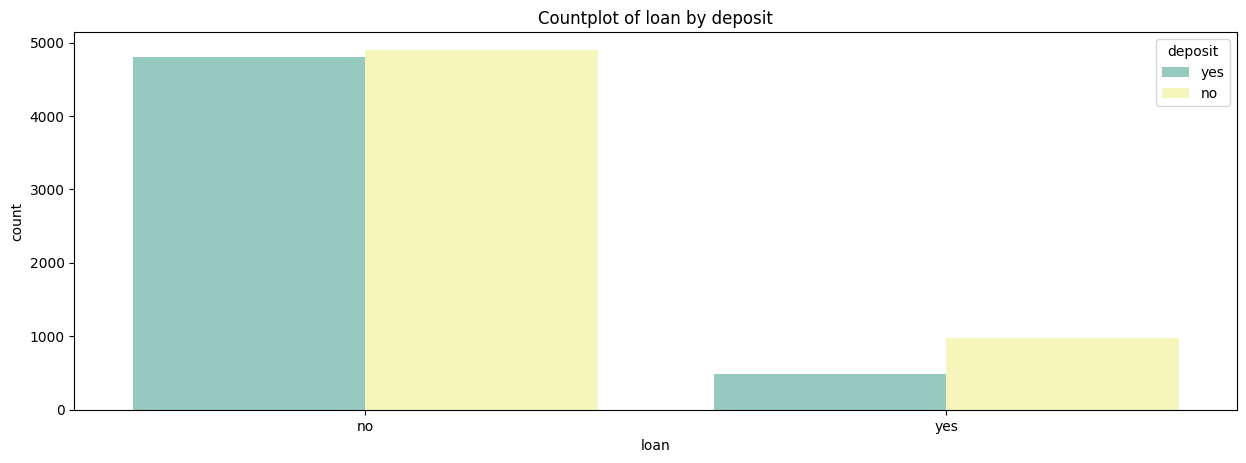

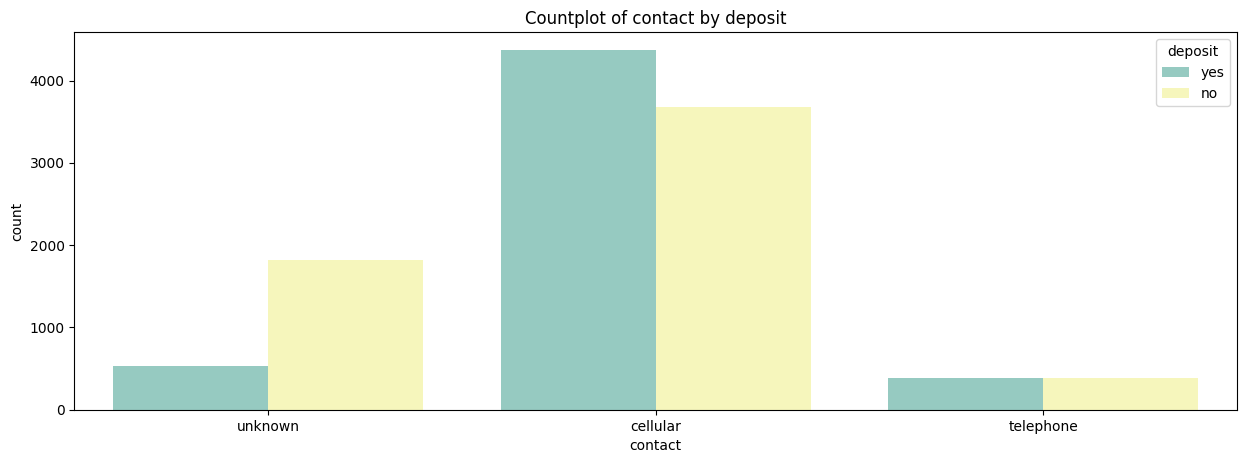

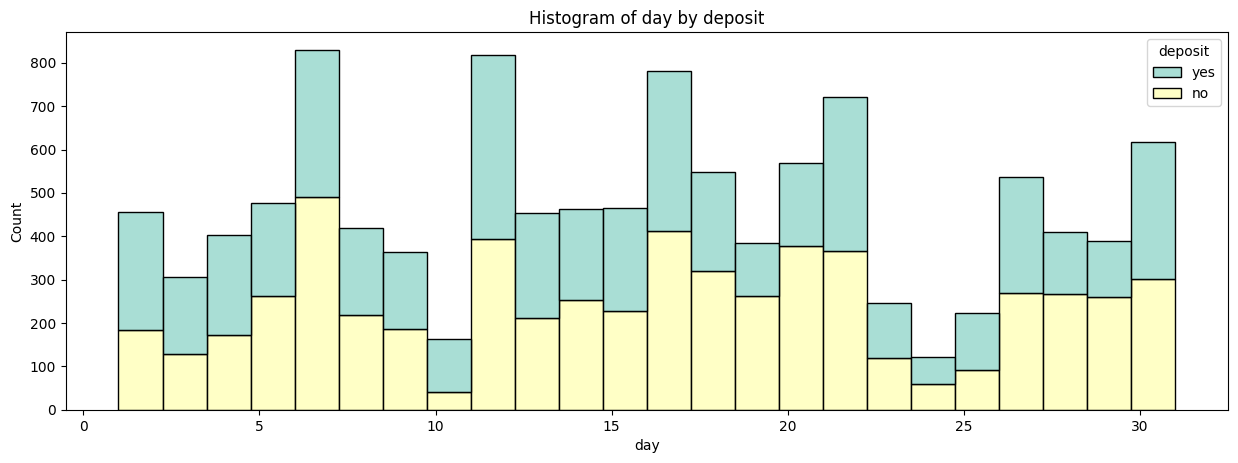

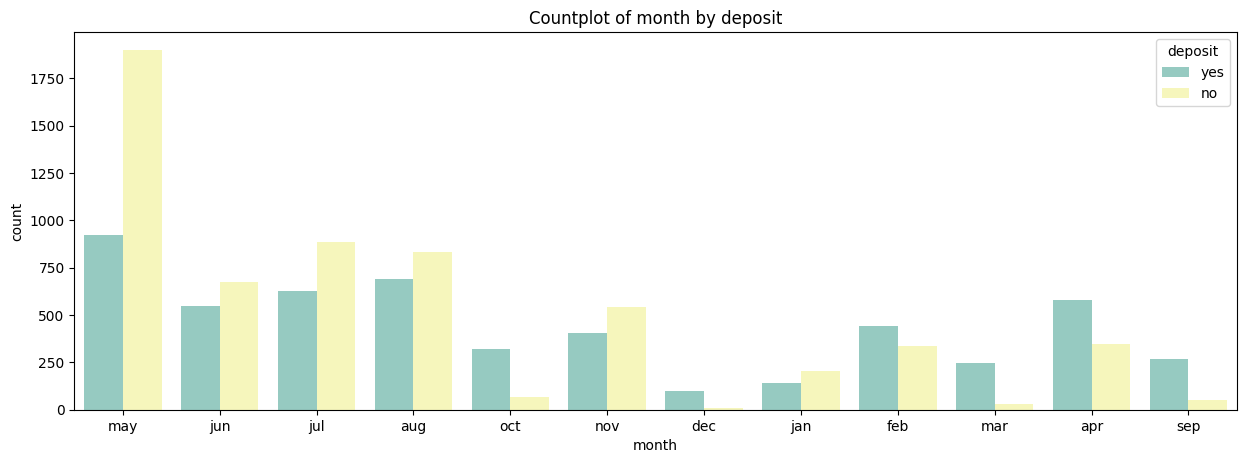

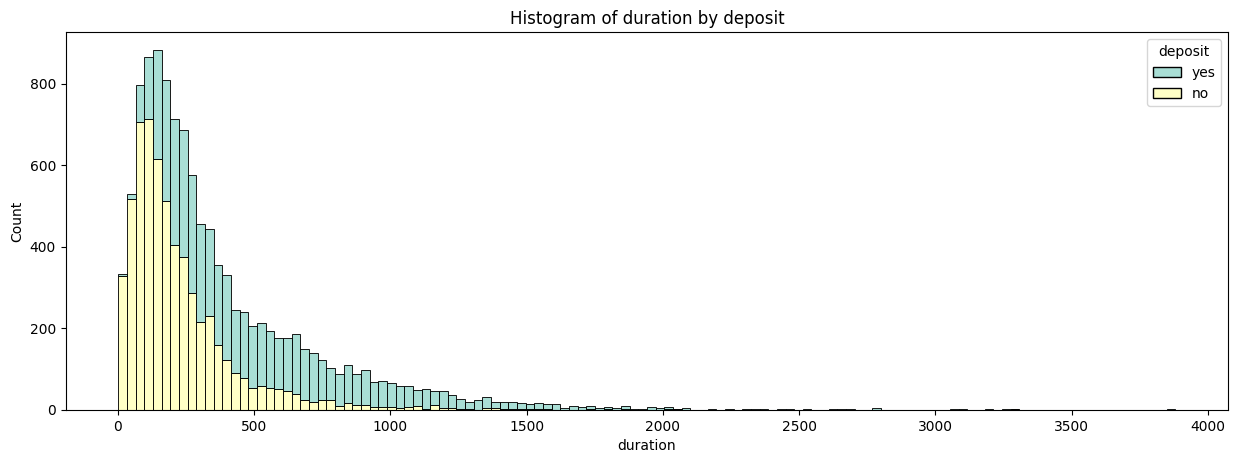

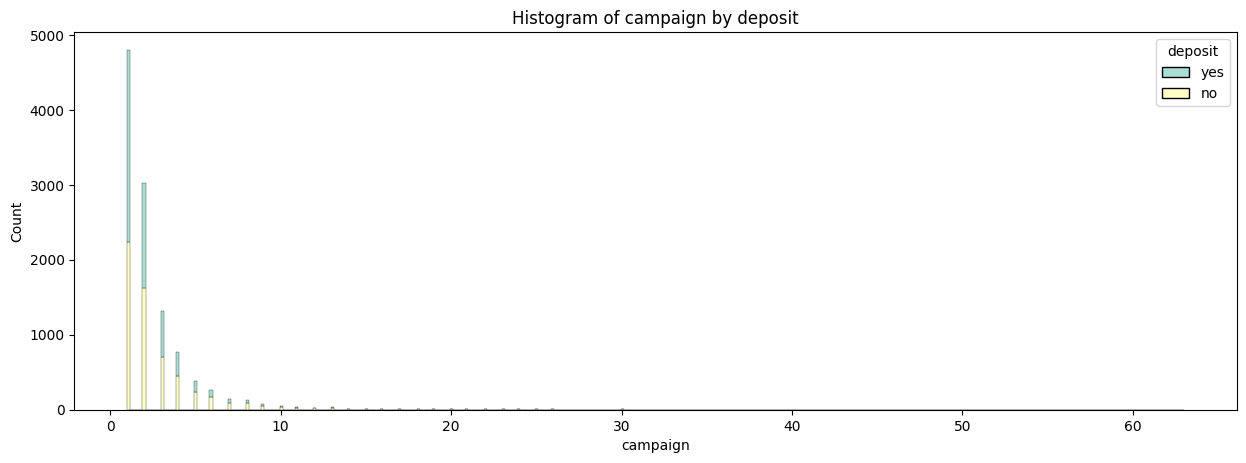

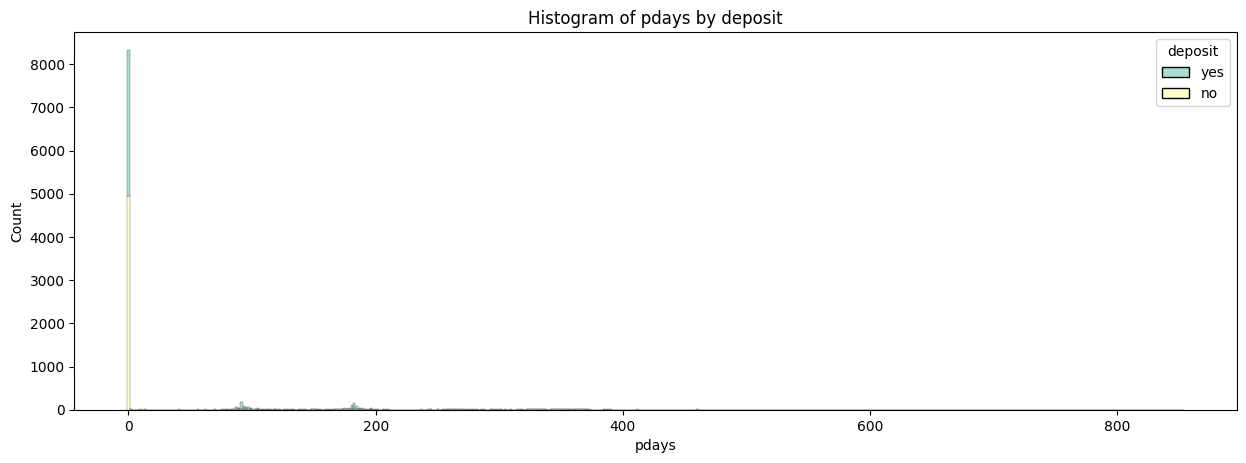

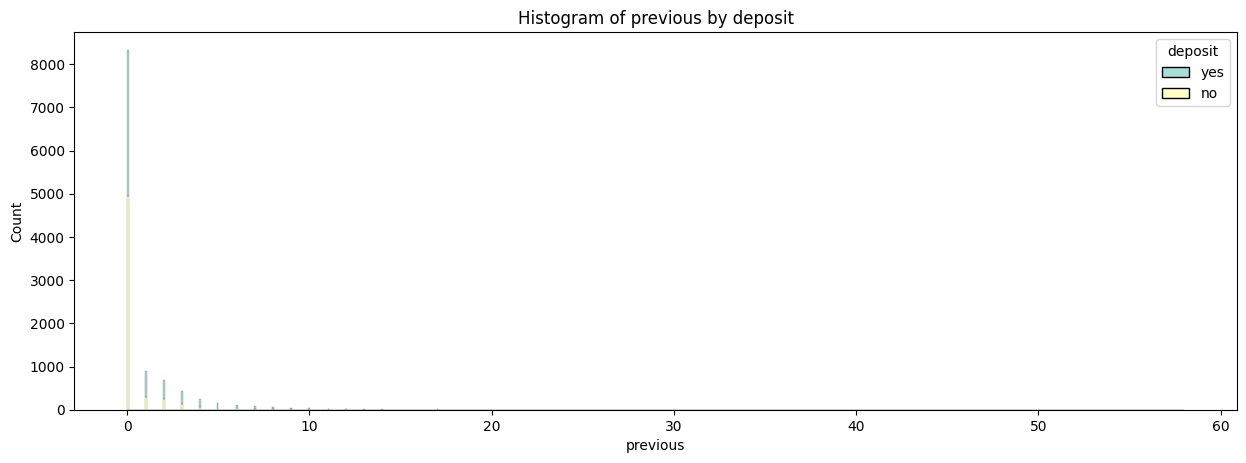

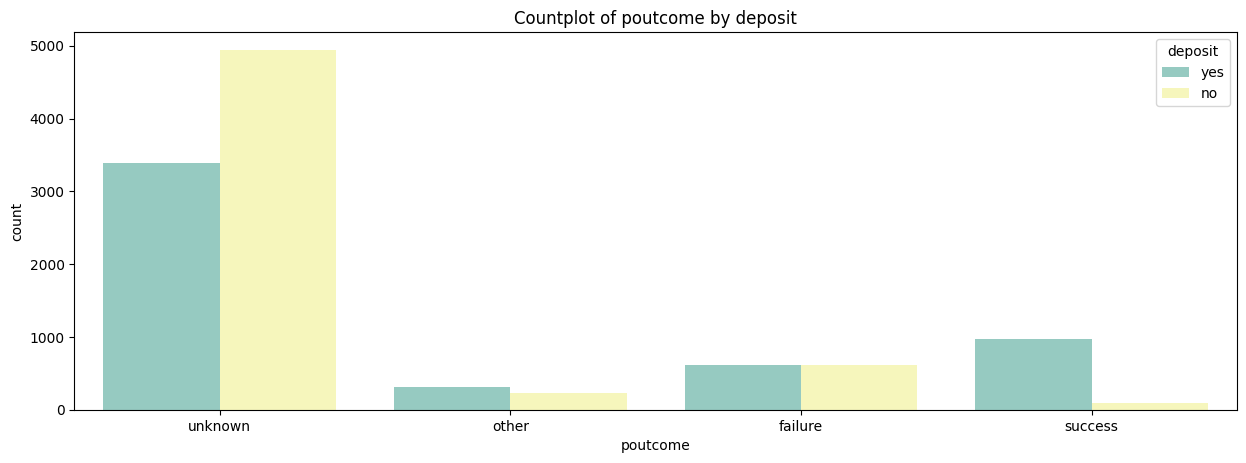

In [6]:
for i in bank_data.columns:
  if i=='deposit':
    break
  elif bank_data.dtypes[i] == "O":
    fig, ax = plt.subplots(figsize=(15,5),dpi=100)
    sns.countplot(x=i, hue="deposit", data=bank_data, palette="Set3")
    plt.title("Countplot of {} by deposit".format(i))
  elif bank_data.dtypes[i] == "int64":
    fig, ax = plt.subplots(figsize=(15,5),dpi=100)
    sns.histplot(bank_data, x=bank_data[i], hue="deposit", multiple="stack",palette="Set3")
    plt.title("Histogram of {} by deposit".format(i))

#### **Checking Data Outliers**

In [7]:
lb_make = LabelEncoder()
bank_data_encode = bank_data.copy()
for i in bank_data.columns:
  if bank_data.dtypes[i] == "O":
    bank_data_encode[i] = lb_make.fit_transform(bank_data[i])
bank_data_encode.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


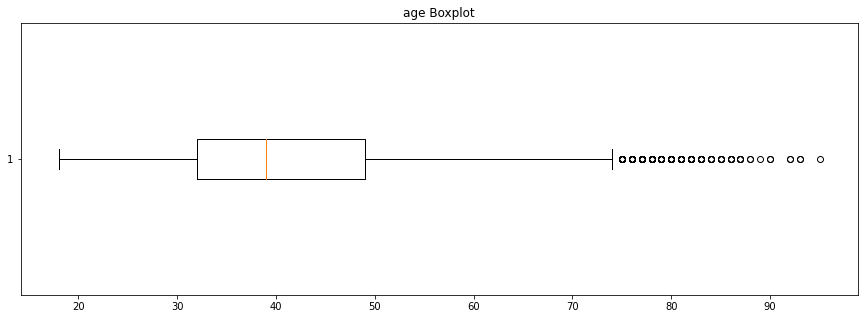

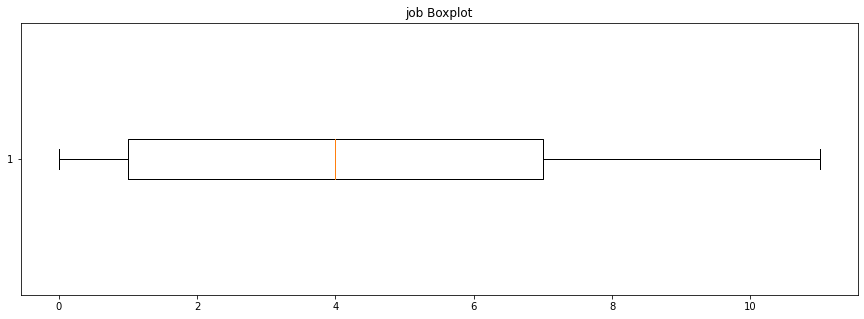

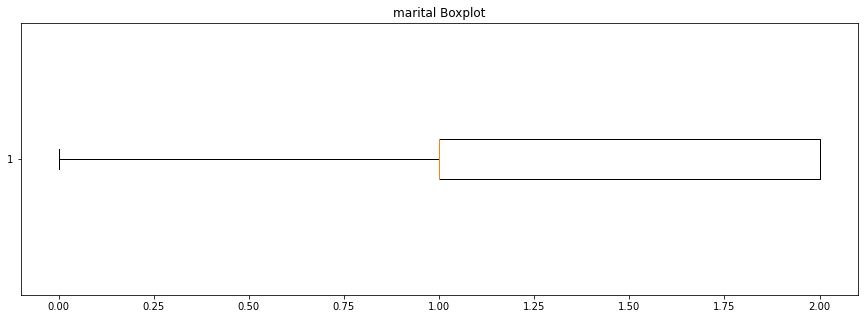

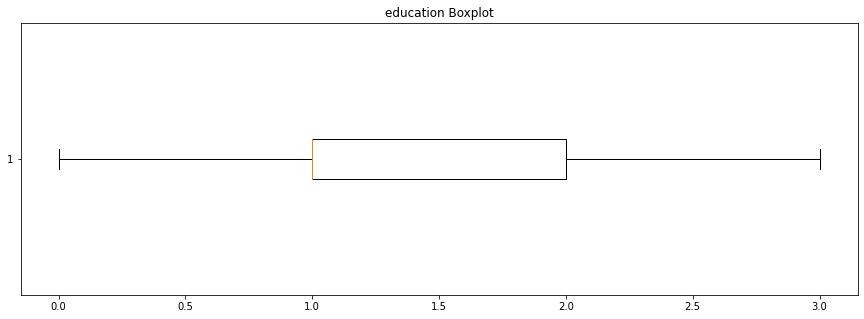

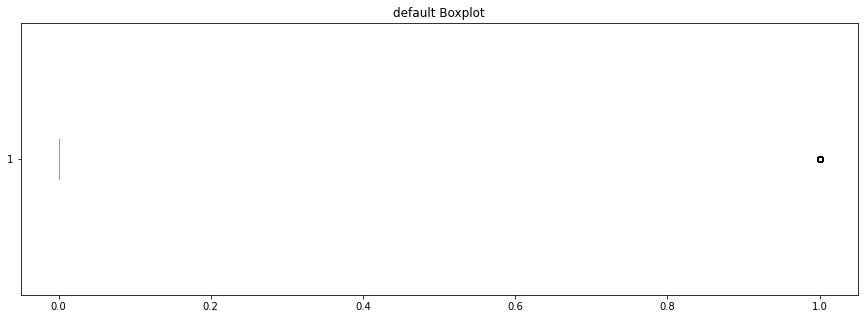

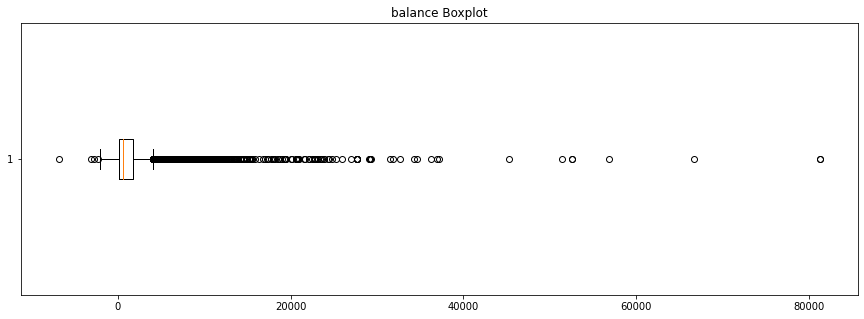

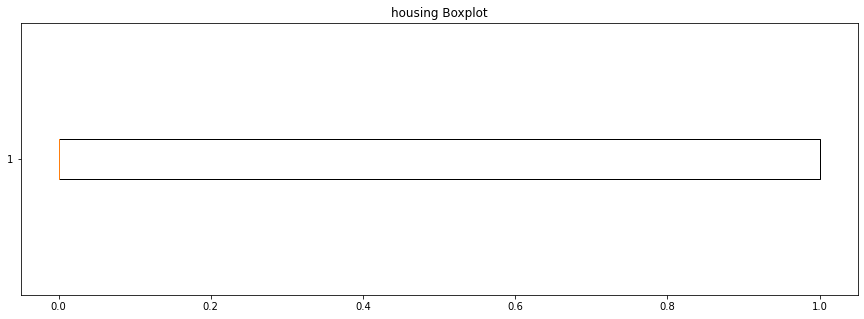

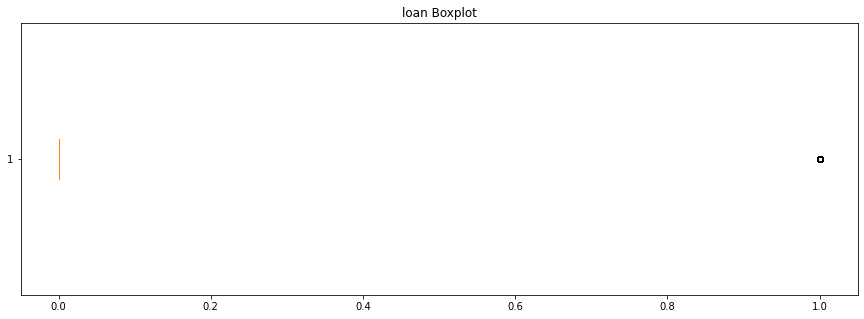

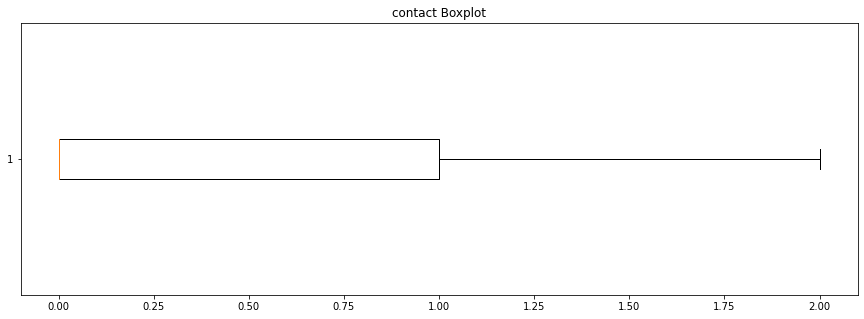

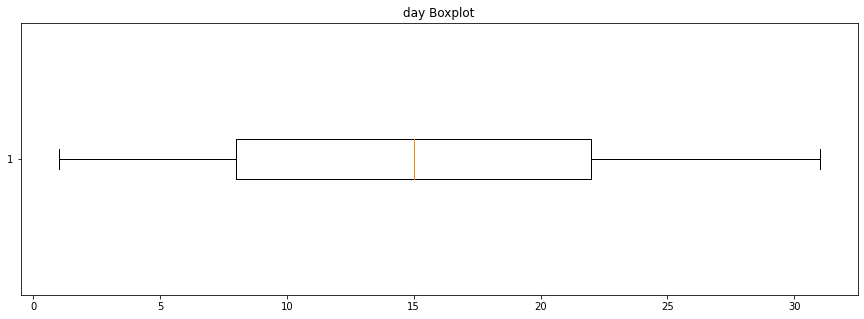

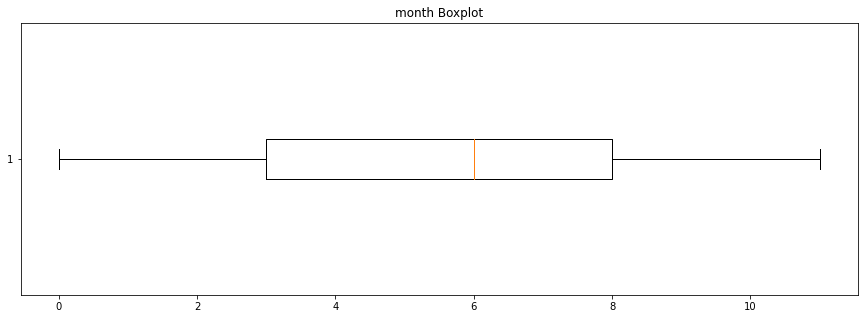

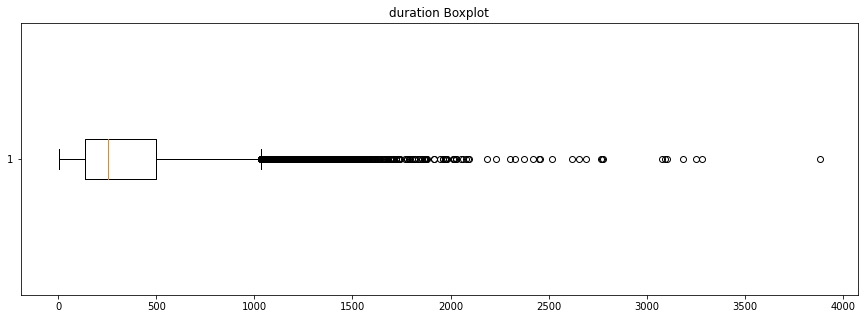

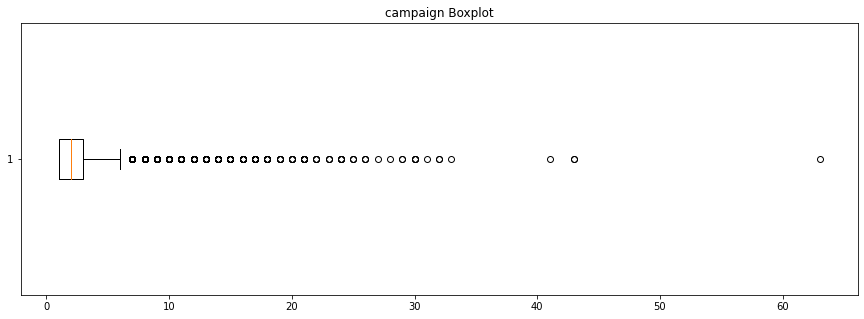

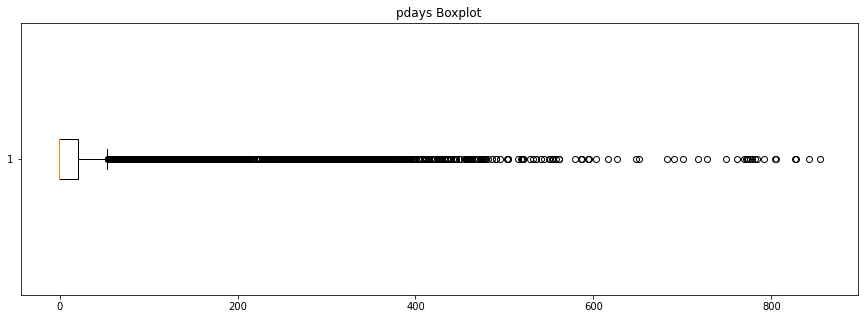

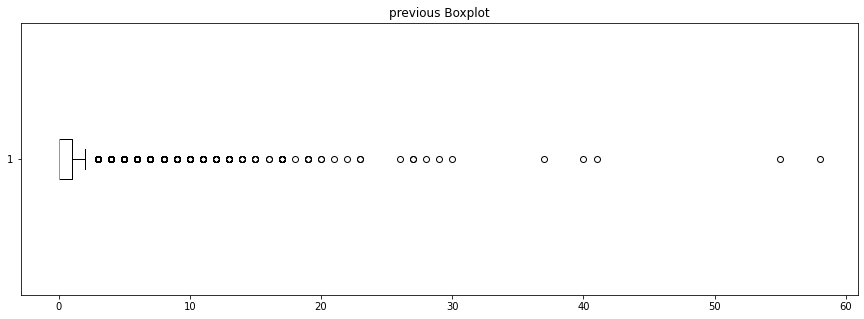

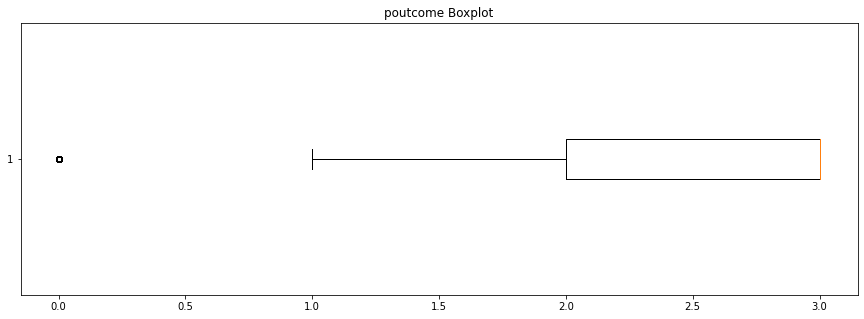

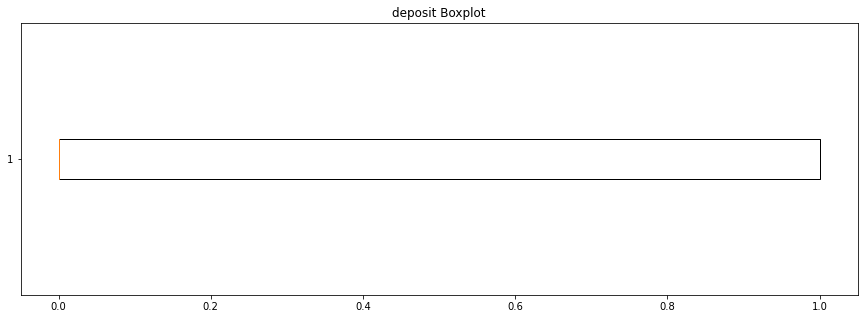

In [8]:
for i in bank_data.columns:
  fig7, ax = plt.subplots(figsize=(15,5))
  ax.set_title('{} Boxplot'.format(i))
  ax.boxplot(bank_data_encode[i],vert=False)
  plt.show()

In [9]:
Q1 = bank_data_encode.quantile(0.25)
Q3 = bank_data_encode.quantile(0.75)
IQR = Q3 - Q1
((bank_data_encode < (Q1 - 1.5 * IQR)) | (bank_data_encode > (Q3 + 1.5 * IQR))).sum()

age           171
job             0
marital         0
education       0
default       168
balance      1055
housing         0
loan         1460
contact         0
day             0
month           0
duration      636
campaign      601
pdays        2750
previous     1258
poutcome     1228
deposit         0
dtype: int64

Dari boxplot diatas kita dapat mengetahui terdapat beberapa atribut yang memiliki outlier. Atribut pdays merupakan atribut yang memiliki jumlah outlier terbanyak. Nantinya data outlier akan di remove sehingga tidak mempengaruhi proses training model

#### **Attribute Correlation**

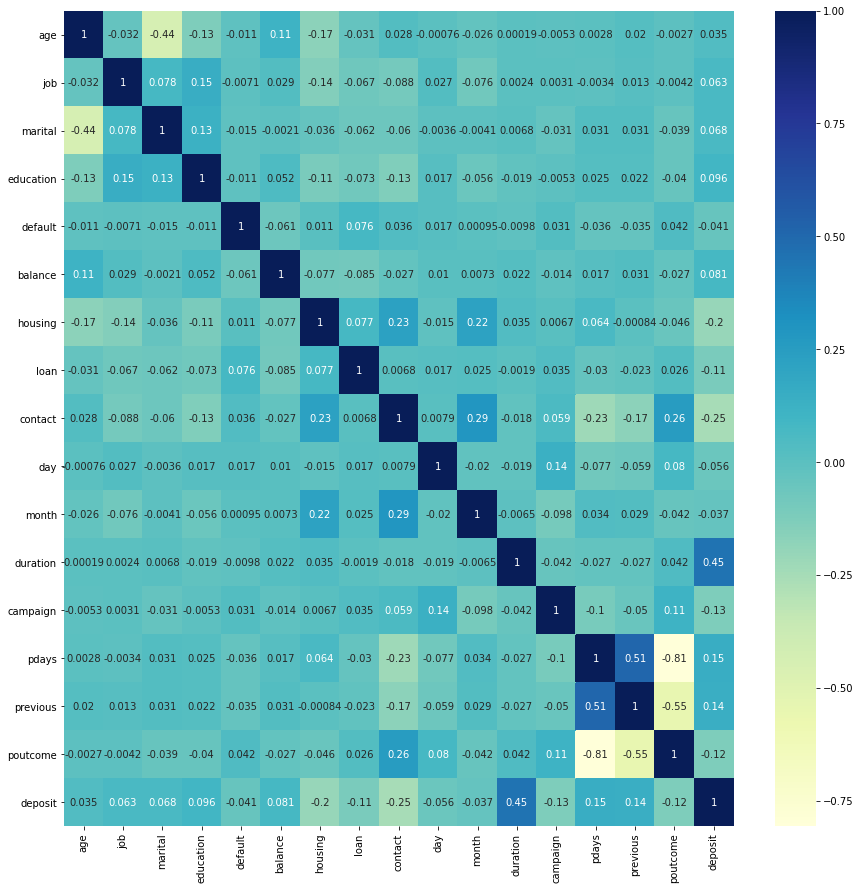

In [10]:
# heatmap columns correlation
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(bank_data_encode.corr(), annot=True,cmap="YlGnBu" )

Dari heatmap diatas, terdapat atribut yang memiliki strong correlation yaitu atribut `pdays` dan atribut `poutcome`. Maka dari itu pada tahap preprocessing nantinya salah satu dari kedua atribut tersebut akan di drop sehingga atribut yang redundan dapat dihilangkan dan dapat mempercepat kinerja model

### **Preprocessing**

#### **Drop Redundance Attribute**

In [11]:
bank_data_encode = bank_data_encode.drop(['pdays'],axis=1)
bank_data_encode.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

#### **Set Target and Feature**

In [12]:
# Select Target
target = bank_data_encode['deposit'].copy()
target

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [13]:
# Select Features
feature = bank_data_encode.drop(['deposit'],axis=1).copy()
feature

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,0,3
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,0,3
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,0,3
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,5,0


#### **Data Normalization**

In [14]:
x = feature.values
x

array([[59,  0,  1, ...,  1,  0,  3],
       [56,  0,  1, ...,  1,  0,  3],
       [41,  9,  1, ...,  1,  0,  3],
       ...,
       [32,  9,  2, ...,  2,  0,  3],
       [43,  9,  1, ...,  2,  5,  0],
       [34,  9,  1, ...,  1,  0,  3]])

In [15]:
zscaler = preprocessing.StandardScaler()
x_scaled = zscaler.fit_transform(x)
feature_normal = pd.DataFrame(x_scaled,columns=feature.columns)
feature_normal

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,1.491505,-1.391604,-0.318672,-0.380501,-0.123617,0.252525,1.055280,-0.387923,1.844786,-1.265746,0.800268,1.930226,-0.554168,-0.363260,0.520705
1,1.239676,-1.391604,-0.318672,-0.380501,-0.123617,-0.459974,-0.947616,-0.387923,1.844786,-1.265746,0.800268,3.154612,-0.554168,-0.363260,0.520705
2,-0.019470,1.399105,-0.318672,-0.380501,-0.123617,-0.080160,1.055280,-0.387923,1.844786,-1.265746,0.800268,2.929901,-0.554168,-0.363260,0.520705
3,1.155733,0.778947,-0.318672,-0.380501,-0.123617,0.293762,1.055280,-0.387923,1.844786,-1.265746,0.800268,0.596366,-0.554168,-0.363260,0.520705
4,1.071790,-1.391604,-0.318672,0.953822,-0.123617,-0.416876,-0.947616,-0.387923,1.844786,-1.265746,0.800268,0.867171,-0.186785,-0.363260,0.520705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-1.081525,1.279987,-1.714823,-0.123617,-0.473616,1.055280,-0.387923,-0.598149,0.515650,-1.706158,-0.331287,-0.554168,-0.363260,0.520705
11158,-0.187357,0.778947,-0.318672,-0.380501,-0.123617,-0.246658,-0.947616,-0.387923,1.844786,0.040612,0.173661,-0.832564,0.547981,-0.363260,0.520705
11159,-0.774958,1.399105,1.279987,-0.380501,-0.123617,-0.464934,-0.947616,-0.387923,-0.598149,0.396891,-1.392855,-0.622258,-0.186785,-0.363260,0.520705
11160,0.148416,1.399105,-0.318672,-0.380501,-0.123617,-0.473926,-0.947616,2.577830,-0.598149,-0.909466,0.800268,-1.045752,-0.186785,1.818332,-2.470600


#### **Remove Outlier**

In [16]:
feature_clean = feature_normal[(feature_normal<3).all(axis=1)]
feature_clean

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,1.491505,-1.391604,-0.318672,-0.380501,-0.123617,0.252525,1.055280,-0.387923,1.844786,-1.265746,0.800268,1.930226,-0.554168,-0.363260,0.520705
2,-0.019470,1.399105,-0.318672,-0.380501,-0.123617,-0.080160,1.055280,-0.387923,1.844786,-1.265746,0.800268,2.929901,-0.554168,-0.363260,0.520705
3,1.155733,0.778947,-0.318672,-0.380501,-0.123617,0.293762,1.055280,-0.387923,1.844786,-1.265746,0.800268,0.596366,-0.554168,-0.363260,0.520705
4,1.071790,-1.391604,-0.318672,0.953822,-0.123617,-0.416876,-0.947616,-0.387923,1.844786,-1.265746,0.800268,0.867171,-0.186785,-0.363260,0.520705
5,0.064473,-0.151289,1.279987,0.953822,-0.123617,-0.473926,1.055280,2.577830,1.844786,-1.265746,0.800268,0.547390,-0.186785,-0.363260,0.520705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-1.081525,1.279987,-1.714823,-0.123617,-0.473616,1.055280,-0.387923,-0.598149,0.515650,-1.706158,-0.331287,-0.554168,-0.363260,0.520705
11158,-0.187357,0.778947,-0.318672,-0.380501,-0.123617,-0.246658,-0.947616,-0.387923,1.844786,0.040612,0.173661,-0.832564,0.547981,-0.363260,0.520705
11159,-0.774958,1.399105,1.279987,-0.380501,-0.123617,-0.464934,-0.947616,-0.387923,-0.598149,0.396891,-1.392855,-0.622258,-0.186785,-0.363260,0.520705
11160,0.148416,1.399105,-0.318672,-0.380501,-0.123617,-0.473926,-0.947616,2.577830,-0.598149,-0.909466,0.800268,-1.045752,-0.186785,1.818332,-2.470600


In [17]:
feature_clean.shape

(10103, 15)

In [18]:
target_clean = target[(feature_normal<3).all(axis=1)]
target_clean

0        1
2        1
3        1
4        1
5        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 10103, dtype: int64

In [19]:
target_clean.shape

(10103,)

#### **Set Training and Testing Data**

In [20]:
# Set Training and Testing Data (70:30)
X_train, X_test, y_train, y_test  = train_test_split(feature_clean , target_clean, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7072, 15)
(3031, 15)
(7072,)
(3031,)


### **KNN Classification**


#### **Train**

In [21]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

    
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.7400198 , 0.71494556, 0.76443418, 0.74166942, 0.7674035 ,
       0.75123722, 0.77169251, 0.76443418, 0.76905312, 0.76245464,
       0.77037281, 0.76509403, 0.77004289, 0.76674365, 0.77268228,
       0.7674035 , 0.77499175, 0.76707357, 0.77037281])

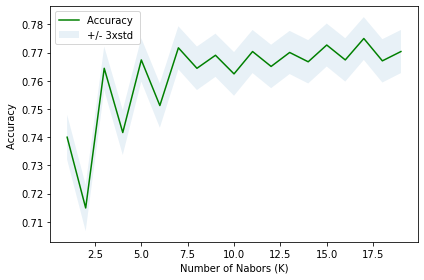

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [23]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7749917518970637 with k= 17


In [24]:
neigh = KNeighborsClassifier(n_neighbors=17)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

#### **Test**

In [25]:
y_pred_knn = neigh.predict(X_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 1])

#### **Evaluation**

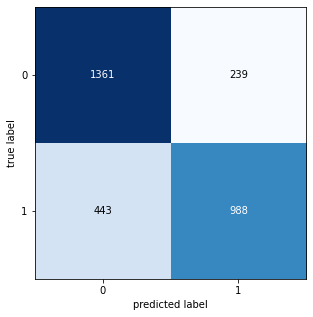

In [26]:
#Show the Confussion Matrix
cm1 = metrics.confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm1, figsize=(5,5))
plt.show()

In [27]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1600
           1       0.81      0.69      0.74      1431

    accuracy                           0.77      3031
   macro avg       0.78      0.77      0.77      3031
weighted avg       0.78      0.77      0.77      3031



### **Random Forest Classification**

#### **Train**

In [28]:
n = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

random_grid = {'n_estimators': n}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
rf_randoms = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 6, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_randoms.fit(X_test, y_test)

Fitting 6 folds for each of 20 candidates, totalling 120 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   38.3s finished


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [29]:
print("Jumlah Pohon Optimal:") # print best parameter after tuning 
print(rf_randoms.best_params_)
print("Parameter Lain yang Digunakan:") # Print how our model looks after hyper-parameter tuning 
print(rf_randoms.best_estimator_)

Jumlah Pohon Optimal:
{'n_estimators': 160}
Parameter Lain yang Digunakan:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [49]:
#Modeling Random Forest
rf = RandomForestClassifier(n_estimators=160, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### **Test**

In [50]:
y_pred_rf= rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 1])

#### **Evaluation**

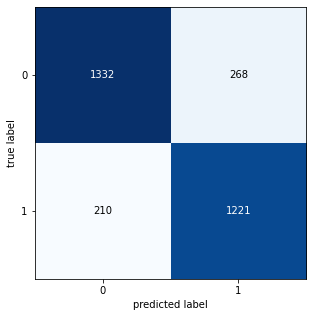

In [51]:
#Show the Confussion Matrix
cm1 = metrics.confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm1, figsize=(5,5))
plt.show()

In [52]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1600
           1       0.82      0.85      0.84      1431

    accuracy                           0.84      3031
   macro avg       0.84      0.84      0.84      3031
weighted avg       0.84      0.84      0.84      3031



### **Naive Bayes Classification**

#### **Train**

In [34]:
# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### **Test**

In [35]:
y_pred_nb= gnb.predict(X_test)
y_pred_nb

array([0, 1, 0, ..., 0, 0, 1])

#### **Evaluation**

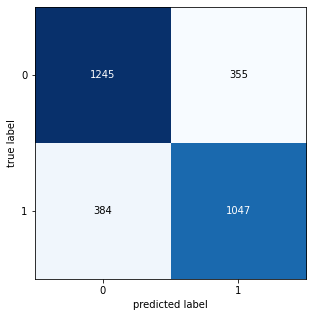

In [36]:
#Show the Confussion Matrix
cm1 = metrics.confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(cm1, figsize=(5,5))
plt.show()

In [37]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1600
           1       0.75      0.73      0.74      1431

    accuracy                           0.76      3031
   macro avg       0.76      0.75      0.76      3031
weighted avg       0.76      0.76      0.76      3031



### **Decision Tree Classification**

#### **Train**

In [38]:
# Modeling Decision Tree

dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

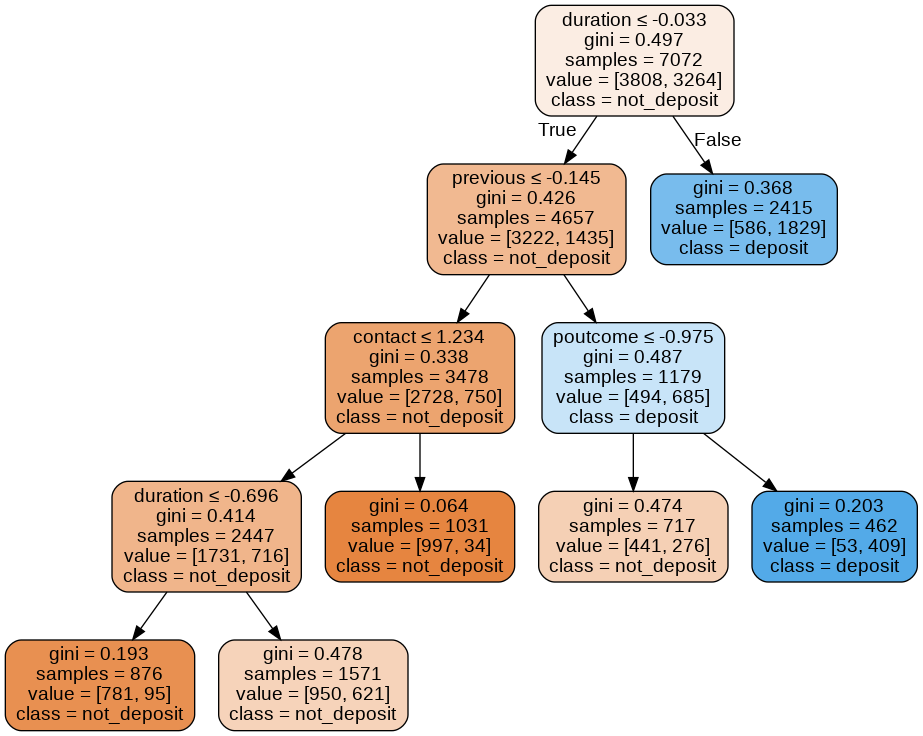

In [39]:
# Visualize Tree
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['not_deposit', 'deposit'],
                feature_names=feature_normal.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### **Test**

In [40]:
y_pred_tree = dtc.predict(X_test)
y_pred_tree

array([0, 0, 0, ..., 0, 0, 1])

#### **Evaluation**

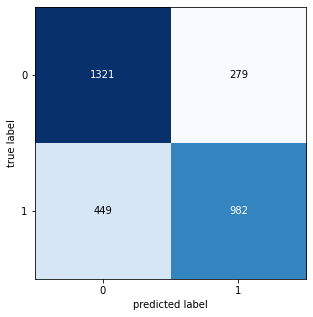

In [41]:
#Show the Confussion Matrix
cm1 = metrics.confusion_matrix(y_test, y_pred_tree)
plot_confusion_matrix(cm1, figsize=(5,5))
plt.show()

In [42]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.75      0.83      0.78      1600
           1       0.78      0.69      0.73      1431

    accuracy                           0.76      3031
   macro avg       0.76      0.76      0.76      3031
weighted avg       0.76      0.76      0.76      3031



### **Model Comparison**

In [53]:
# Comparing Model Performance
print("KNN Accuracy =", metrics.accuracy_score(y_test, y_pred_knn))
print("KNN Precision =", metrics.precision_score(y_test, y_pred_knn))
print("KNN Recall =", metrics.recall_score(y_test, y_pred_knn))
print("KNN F1-Score =", metrics.f1_score(y_test, y_pred_knn))
print("_______________________")
print("Random Forest Accuracy =", metrics.accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision =", metrics.precision_score(y_test, y_pred_rf))
print("Random Forest Recall =", metrics.recall_score(y_test, y_pred_rf))
print("Random Forest F1-Score =", metrics.f1_score(y_test, y_pred_rf))
print("_______________________")
print("Naive Bayes Accuracy =", metrics.accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Precision =", metrics.precision_score(y_test, y_pred_nb))
print("Naive Bayes Recall =", metrics.recall_score(y_test, y_pred_nb))
print("Naive Bayes F1-Score =", metrics.f1_score(y_test, y_pred_nb))
print("_______________________")
print("Decision Tree Accuracy =", metrics.accuracy_score(y_test, y_pred_tree))
print("Decision Tree Precision =", metrics.precision_score(y_test, y_pred_tree))
print("Decision Tree Recall =", metrics.recall_score(y_test, y_pred_tree))
print("Decision Tree F1-Score =", metrics.f1_score(y_test, y_pred_tree))

KNN Accuracy = 0.7749917518970637
KNN Precision = 0.8052159739201304
KNN Recall = 0.6904262753319357
KNN F1-Score = 0.7434161023325809
_______________________
Random Forest Accuracy = 0.8422962718574728
Random Forest Precision = 0.8200134318334452
Random Forest Recall = 0.8532494758909853
Random Forest F1-Score = 0.8363013698630137
_______________________
Naive Bayes Accuracy = 0.7561860772022435
Naive Bayes Precision = 0.7467902995720399
Naive Bayes Recall = 0.7316561844863732
Naive Bayes F1-Score = 0.739145781856689
_______________________
Decision Tree Accuracy = 0.7598152424942263
Decision Tree Precision = 0.7787470261697066
Decision Tree Recall = 0.6862334032145353
Decision Tree F1-Score = 0.7295690936106984


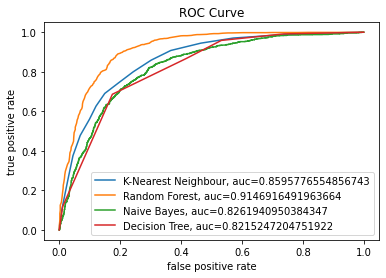

In [54]:
y_pred_knn_proba = neigh.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
aucknn = metrics.roc_auc_score(y_test, y_pred_knn_proba)

y_pred_rf_proba = rf.predict_proba(X_test)[::,1]
fprrf, tprrf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
aucrf = metrics.roc_auc_score(y_test, y_pred_rf_proba)

y_pred_nb_proba = gnb.predict_proba(X_test)[::,1]
fprnb, tprnb, _ = metrics.roc_curve(y_test,  y_pred_nb_proba)
aucnb = metrics.roc_auc_score(y_test, y_pred_nb_proba)

y_pred_tree_proba = dtc.predict_proba(X_test)[::,1]
fprtree, tprtree, _ = metrics.roc_curve(y_test,  y_pred_tree_proba)
auctree = metrics.roc_auc_score(y_test, y_pred_tree_proba)

# Comparing ROC Curves
plt.plot(fprknn,tprknn,label="K-Nearest Neighbour, auc="+str(aucknn))
plt.plot(fprrf,tprrf,label="Random Forest, auc="+str(aucrf))
plt.plot(fprnb,tprnb,label="Naive Bayes, auc="+str(aucnb))
plt.plot(fprtree,tprtree,label="Decision Tree, auc="+str(auctree))
plt.title('ROC Curve')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### **Conclusion**

Berdasarkan 4 metode klasifikasi diatas dapat dilihat bahwa metode klasifikasi dengan menggunakan random forest menghasilkan akurasi yang paling baik. Hal ini berarti Random Forest adalah metode klasifikasi paling baik untuk prediksi deposit pada dataset bank marketing. Berikut merupakan rincian performansi yang didapatkan:

* Random Forest Accuracy = 84.23%
* Random Forest Precision = 82.00%
* Random Forest Recall = 85.33%
* Random Forest F1-Score = 83.63%
* Random Forest AUC = 91.47%